___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# AutoEncoders for Dimensionality Reduction

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
from sklearn.datasets import make_blobs

In [35]:
data = make_blobs(n_samples=300,
    n_features=2,
    centers=2,
    cluster_std=1.0,random_state=101)

In [36]:
X,y = data

In [37]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [38]:
feat = pd.DataFrame(X)
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']

In [39]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


In [40]:
plt.scatter(feat['X1'],feat['X2'],c=y)

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

In [41]:
from mpl_toolkits.mplot3d import Axes3D

In [42]:
%matplotlib notebook

<IPython.core.display.Javascript object>


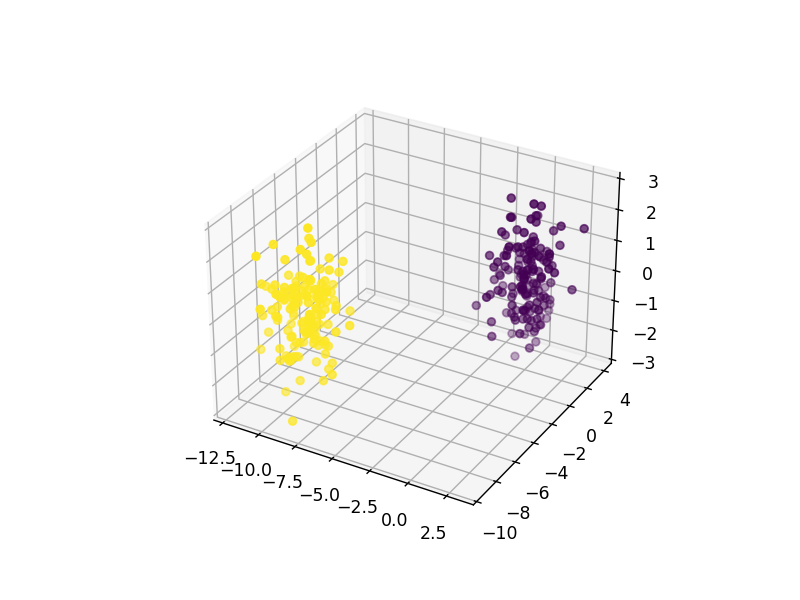

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

# Encoder and Decoder

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [45]:
# 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [46]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [47]:
# ENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
# Note how all the data is used! There is no "right" answer here
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [50]:
# scaled_data

In [51]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 999us/step - loss: 0.3773
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3350
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3350
Epoch 4/5
10/10 [==============================] - 0s 700us/step - loss: 0.3350
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3350


In [52]:
encoded_2dim = encoder.predict(scaled_data)

In [53]:
encoded_2dim

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [54]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method